# 1. Import and Install Dependencies

In [60]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [61]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [62]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [63]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [64]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [65]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [66]:
len(results.left_hand_landmarks.landmark)

21

In [67]:
results

mediapipe.python.solution_base.SolutionOutputs

In [68]:
draw_landmarks(frame, results)

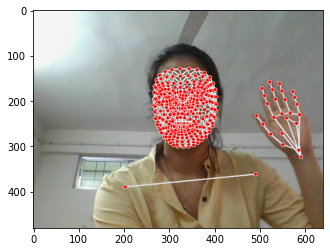

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [69]:
len(results.left_hand_landmarks.landmark)

21

In [70]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [71]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [72]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (<ipython-input-72-3fe2adb7da0b>, line 2)

In [73]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [74]:
result_test = extract_keypoints(results)

In [75]:
result_test

array([ 0.50801659,  0.62546444, -0.57376271, ...,  0.48574057,
        0.69182271, -0.05002489])

In [76]:
468*3+33*4+21*3+21*3

1662

In [77]:
np.save('0', result_test)

In [78]:
np.load('0.npy')

array([ 0.50801659,  0.62546444, -0.57376271, ...,  0.48574057,
        0.69182271, -0.05002489])

# 4. Setup Folders for Collection

In [79]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [80]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [81]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [82]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [83]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [84]:
label_map = {label:num for num, label in enumerate(actions)}

In [85]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [86]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [87]:
np.array(sequences).shape

(90, 30, 1662)

In [88]:
np.array(labels).shape

(90,)

In [89]:
X = np.array(sequences)

In [90]:
X.shape

(90, 30, 1662)

In [91]:
y = to_categorical(labels).astype(int)

In [92]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [94]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [96]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [97]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [98]:
res = [.7, 0.2, 0.1]

In [99]:
actions[np.argmax(res)]

'hello'

In [100]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 442ms/step - loss: 4.5222 - categorical_accuracy: 0.3816
Epoch 2/2000
3/3 [==============================] - 0s 109ms/step - loss: 26.0637 - categorical_accuracy: 0.2055
Epoch 3/2000
3/3 [==============================] - 0s 100ms/step - loss: 14.7099 - categorical_accuracy: 0.4168
Epoch 4/2000
3/3 [==============================] - 0s 106ms/step - loss: 37.3006 - categorical_accuracy: 0.2877
Epoch 5/2000
3/3 [==============================] - 0s 102ms/step - loss: 35.4643 - categorical_accuracy: 0.3953
Epoch 6/2000
3/3 [==============================] - 0s 102ms/step - loss: 67.7257 - categorical_accuracy: 0.3229
Epoch 7/2000
3/3 [==============================] - 0s 105ms/step - loss: 96.7783 - categorical_accuracy: 0.4286
Epoch 8/2000
3/3 [==============================] - 0s 107ms/step - loss: 99.0930 - categorical_accuracy: 0.3288
Epoch 9/2000
3/3 [==============================] - 0s 104ms/step - loss: 122.6550 - categorical_

3/3 [==============================] - 0s 98ms/step - loss: 0.3359 - categorical_accuracy: 0.9569
Epoch 74/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.3354 - categorical_accuracy: 0.9217
Epoch 75/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.3012 - categorical_accuracy: 0.9726
Epoch 76/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.3305 - categorical_accuracy: 0.9628
Epoch 77/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.2619 - categorical_accuracy: 0.9745
Epoch 78/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2605 - categorical_accuracy: 0.9706
Epoch 79/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2455 - categorical_accuracy: 0.9295
Epoch 80/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2775 - categorical_accuracy: 0.9472
Epoch 81/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2075 - categorical_accuracy: 0.9843
E

3/3 [==============================] - 0s 100ms/step - loss: 0.0995 - categorical_accuracy: 0.9765
Epoch 146/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0914 - categorical_accuracy: 0.9824
Epoch 147/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.1049 - categorical_accuracy: 0.9824
Epoch 148/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0710 - categorical_accuracy: 0.9804
Epoch 149/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0533 - categorical_accuracy: 0.9941
Epoch 150/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0933 - categorical_accuracy: 0.9824
Epoch 151/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0835 - categorical_accuracy: 0.9824
Epoch 152/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0571 - categorical_accuracy: 0.9941
Epoch 153/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0596 - categorical_accuracy:

3/3 [==============================] - 0s 100ms/step - loss: 0.1403 - categorical_accuracy: 0.9530
Epoch 218/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0883 - categorical_accuracy: 0.9824
Epoch 219/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0682 - categorical_accuracy: 0.9824
Epoch 220/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0847 - categorical_accuracy: 0.9608
Epoch 221/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0708 - categorical_accuracy: 0.9648
Epoch 222/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0509 - categorical_accuracy: 0.9882
Epoch 223/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0461 - categorical_accuracy: 0.9765
Epoch 224/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0546 - categorical_accuracy: 0.9726
Epoch 225/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0432 - categorical_accuracy: 0

3/3 [==============================] - 0s 99ms/step - loss: 0.0118 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0153 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0172 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0129 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0146 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0117 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0128 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0123 - categorical_accuracy: 1.0000
Epoch 297/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0148 - categorical_accuracy: 

3/3 [==============================] - 0s 97ms/step - loss: 0.0073 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0060 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0061 - categorical_accuracy: 1.0000
Epoch 367/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0063 - categorical_accuracy: 1.0000
Epoch 368/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 369/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0055 - categorical_accuracy: 1

3/3 [==============================] - 0s 100ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0040 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0045 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0044 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0038 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0037 - categorical_accuracy

3/3 [==============================] - 0s 93ms/step - loss: 0.0033 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0027 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0032 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0028 - categorical_accuracy: 

3/3 [==============================] - 0s 99ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0024 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0022 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0020 - categorical_accuracy: 1.0000
Epoch 582/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 583/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0022 - categorical_accuracy:

3/3 [==============================] - 0s 101ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 653/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 654/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 655/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0016 - categorical_accuracy: 1

3/3 [==============================] - 0s 100ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0016 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0015 - categorical_accuracy: 1.0000
Epoch 727/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0016 - categorical_accuracy

3/3 [==============================] - 0s 107ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 792/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 794/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 795/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0011 - categorical_accuracy: 1.0000
Epoch 796/2000
3/3 [==============================] - 0s 109ms/step - loss: 9.9537e-04 - categorical_accuracy: 1.0000
Epoch 797/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 798/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0010 - categorical_accuracy: 1.0000
Epoch 799/2000
3/3 [==============================] - 0s 103ms/step - loss: 9.8915e-04 - categorica

3/3 [==============================] - 0s 96ms/step - loss: 8.4683e-04 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 104ms/step - loss: 9.5551e-04 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 88ms/step - loss: 9.4763e-04 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 87ms/step - loss: 7.9136e-04 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 100ms/step - loss: 9.3695e-04 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 99ms/step - loss: 9.1702e-04 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 100ms/step - loss: 8.6096e-04 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 99ms/step - loss: 8.9160e-04 - categorical_accuracy: 1.0000
Epoch 870/2000
3/3 [==============================] - 0s 98ms/step - loss: 0

3/3 [==============================] - 0s 102ms/step - loss: 7.4081e-04 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 95ms/step - loss: 7.2564e-04 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.4108e-04 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 100ms/step - loss: 7.5437e-04 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 92ms/step - loss: 7.6323e-04 - categorical_accuracy: 1.0000
Epoch 936/2000
3/3 [==============================] - 0s 90ms/step - loss: 6.3151e-04 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.3847e-04 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 102ms/step - loss: 7.5460e-04 - categorical_accuracy: 1.0000
Epoch 939/2000
3/3 [==============================] - 0s 102ms/step - loss:

3/3 [==============================] - 0s 97ms/step - loss: 6.4758e-04 - categorical_accuracy: 1.0000
Epoch 1001/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.7295e-04 - categorical_accuracy: 1.0000
Epoch 1002/2000
3/3 [==============================] - 0s 105ms/step - loss: 6.4123e-04 - categorical_accuracy: 1.0000
Epoch 1003/2000
3/3 [==============================] - 0s 110ms/step - loss: 7.4796e-04 - categorical_accuracy: 1.0000
Epoch 1004/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.4199e-04 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 100ms/step - loss: 5.7339e-04 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.0175e-04 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 102ms/step - loss: 6.0361e-04 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 104ms/step

3/3 [==============================] - 0s 94ms/step - loss: 5.7809e-04 - categorical_accuracy: 1.0000
Epoch 1069/2000
3/3 [==============================] - 0s 102ms/step - loss: 4.6180e-04 - categorical_accuracy: 1.0000
Epoch 1070/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.0511e-04 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 108ms/step - loss: 5.2126e-04 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 100ms/step - loss: 4.9652e-04 - categorical_accuracy: 1.00000s - loss: 4.3447e-04 - categorical_accuracy: 1.
Epoch 1073/2000
3/3 [==============================] - 0s 96ms/step - loss: 5.8067e-04 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 103ms/step - loss: 5.9962e-04 - categorical_accuracy: 1.0000
Epoch 1075/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.3532e-04 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 

3/3 [==============================] - 0s 96ms/step - loss: 5.2551e-04 - categorical_accuracy: 1.0000
Epoch 1137/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.3812e-04 - categorical_accuracy: 1.0000
Epoch 1138/2000
3/3 [==============================] - 0s 99ms/step - loss: 5.6399e-04 - categorical_accuracy: 1.0000
Epoch 1139/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.0483e-04 - categorical_accuracy: 1.0000
Epoch 1140/2000
3/3 [==============================] - 0s 99ms/step - loss: 4.7964e-04 - categorical_accuracy: 1.0000
Epoch 1141/2000
3/3 [==============================] - 0s 100ms/step - loss: 4.5735e-04 - categorical_accuracy: 1.0000
Epoch 1142/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.3466e-04 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 102ms/step - loss: 4.2730e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 100ms/ste

3/3 [==============================] - 0s 104ms/step - loss: 4.6951e-04 - categorical_accuracy: 1.0000
Epoch 1206/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.1021e-04 - categorical_accuracy: 1.0000
Epoch 1207/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.7938e-04 - categorical_accuracy: 1.0000
Epoch 1208/2000
3/3 [==============================] - 0s 114ms/step - loss: 4.6858e-04 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 107ms/step - loss: 4.1430e-04 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 113ms/step - loss: 4.3890e-04 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 114ms/step - loss: 4.0876e-04 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 116ms/step - loss: 4.0945e-04 - categorical_accuracy: 1.0000
Epoch 1213/2000
3/3 [==============================] - 0s 107ms/

3/3 [==============================] - 0s 101ms/step - loss: 3.9990e-04 - categorical_accuracy: 1.0000
Epoch 1275/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.6019e-04 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.7629e-04 - categorical_accuracy: 1.0000
Epoch 1277/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.7258e-04 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.9358e-04 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.4738e-04 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 104ms/step - loss: 3.3374e-04 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.1378e-04 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 100ms/st

3/3 [==============================] - 0s 100ms/step - loss: 2.7287e-04 - categorical_accuracy: 1.0000
Epoch 1344/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.4200e-04 - categorical_accuracy: 1.0000
Epoch 1345/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.1856e-04 - categorical_accuracy: 1.0000
Epoch 1346/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.7735e-04 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.9901e-04 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.1110e-04 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.5518e-04 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.5497e-04 - categorical_accuracy: 1.0000
Epoch 1351/2000
3/3 [==============================] - 0s 101ms/ste

3/3 [==============================] - 0s 98ms/step - loss: 2.7888e-04 - categorical_accuracy: 1.0000
Epoch 1413/2000
3/3 [==============================] - 0s 101ms/step - loss: 2.4360e-04 - categorical_accuracy: 1.0000
Epoch 1414/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.5880e-04 - categorical_accuracy: 1.0000
Epoch 1415/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.6283e-04 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.8064e-04 - categorical_accuracy: 1.0000
Epoch 1417/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.5809e-04 - categorical_accuracy: 1.0000
Epoch 1418/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.7099e-04 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.8866e-04 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 95ms/step

3/3 [==============================] - 0s 96ms/step - loss: 2.4037e-04 - categorical_accuracy: 1.0000
Epoch 1482/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.2902e-04 - categorical_accuracy: 1.0000
Epoch 1483/2000
3/3 [==============================] - 0s 100ms/step - loss: 2.3675e-04 - categorical_accuracy: 1.0000
Epoch 1484/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.4763e-04 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.6097e-04 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.4031e-04 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.9912e-04 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.0350e-04 - categorical_accuracy: 1.0000
Epoch 1489/2000
3/3 [==============================] - 0s 100ms/ste

3/3 [==============================] - 0s 92ms/step - loss: 2.2509e-04 - categorical_accuracy: 1.0000
Epoch 1551/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.1671e-04 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 101ms/step - loss: 2.0480e-04 - categorical_accuracy: 1.0000
Epoch 1553/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.8108e-04 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9947e-04 - categorical_accuracy: 1.0000
Epoch 1555/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.7770e-04 - categorical_accuracy: 1.0000
Epoch 1556/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.0794e-04 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.0879e-04 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 100ms/step 

3/3 [==============================] - 0s 101ms/step - loss: 1.8940e-04 - categorical_accuracy: 1.0000
Epoch 1620/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.7779e-04 - categorical_accuracy: 1.0000
Epoch 1621/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.9512e-04 - categorical_accuracy: 1.0000
Epoch 1622/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.9909e-04 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.9166e-04 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.6696e-04 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.8833e-04 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7130e-04 - categorical_accuracy: 1.0000
Epoch 1627/2000
3/3 [==============================] - 0s 94ms/step - 

3/3 [==============================] - 0s 103ms/step - loss: 1.7583e-04 - categorical_accuracy: 1.0000
Epoch 1689/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.8370e-04 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.5859e-04 - categorical_accuracy: 1.0000
Epoch 1691/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.4874e-04 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.5194e-04 - categorical_accuracy: 1.0000
Epoch 1693/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.7072e-04 - categorical_accuracy: 1.0000
Epoch 1694/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.4582e-04 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.6201e-04 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 100ms/ste

3/3 [==============================] - 0s 98ms/step - loss: 1.1599e-04 - categorical_accuracy: 1.0000
Epoch 1757/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1969e-04 - categorical_accuracy: 1.0000
Epoch 1758/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.3731e-04 - categorical_accuracy: 1.0000
Epoch 1759/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.4126e-04 - categorical_accuracy: 1.0000
Epoch 1760/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.2655e-04 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.3350e-04 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1981e-04 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.4372e-04 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 106ms/step 

3/3 [==============================] - 0s 95ms/step - loss: 1.3157e-04 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.2562e-04 - categorical_accuracy: 1.0000
Epoch 1827/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1845e-04 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1746e-04 - categorical_accuracy: 1.0000
Epoch 1829/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1660e-04 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1418e-04 - categorical_accuracy: 1.0000
Epoch 1831/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.3178e-04 - categorical_accuracy: 1.0000
Epoch 1832/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1515e-04 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 98ms/step

3/3 [==============================] - 0s 92ms/step - loss: 1.1284e-04 - categorical_accuracy: 1.0000
Epoch 1894/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0740e-04 - categorical_accuracy: 1.0000
Epoch 1895/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1458e-04 - categorical_accuracy: 1.0000
Epoch 1896/2000
3/3 [==============================] - 0s 99ms/step - loss: 8.6357e-05 - categorical_accuracy: 1.0000
Epoch 1897/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.2285e-04 - categorical_accuracy: 1.0000
Epoch 1898/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0046e-04 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1110e-04 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1050e-04 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 100ms/ste

3/3 [==============================] - 0s 106ms/step - loss: 9.5037e-05 - categorical_accuracy: 1.0000
Epoch 1963/2000
3/3 [==============================] - 0s 108ms/step - loss: 9.9600e-05 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 114ms/step - loss: 8.5983e-05 - categorical_accuracy: 1.0000
Epoch 1965/2000
3/3 [==============================] - 0s 108ms/step - loss: 9.4140e-05 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 104ms/step - loss: 8.2846e-05 - categorical_accuracy: 1.0000
Epoch 1967/2000
3/3 [==============================] - 0s 103ms/step - loss: 8.8220e-05 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0179e-04 - categorical_accuracy: 1.0000
Epoch 1969/2000
3/3 [==============================] - 0s 101ms/step - loss: 9.1546e-05 - categorical_accuracy: 1.0000
Epoch 1970/2000
3/3 [==============================] - 0s 92ms/s

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [102]:
res = model.predict(X_test)

In [103]:
actions[np.argmax(res[4])]

'iloveyou'

In [104]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [105]:
model.save('action.h5')

In [106]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [107]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [108]:
yhat = model.predict(X_test)

In [109]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [110]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[1, 1],
        [3, 0]],

       [[1, 3],
        [0, 1]]], dtype=int64)

In [111]:
accuracy_score(ytrue, yhat)

0.2

# 11. Test in Real Time

In [113]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        # sequence.insert(0,keypoints)
        # sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
          #3 viz logic
        if res[np.argmax(res)].all() > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640,40), (245,117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


IndexError: index 5 is out of bounds for axis 0 with size 5